## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Criteria	

1. Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive 6

2. Illustrate the insights based on EDA
- Key meaningful observations on the relationship between variables 5


3. Data Pre-processing
- Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling 5

4. Model building - Logistic Regression
- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required 6

5. Model building - Bagging and Boosting
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models 8

6. Hyperparameter tuning using grid search
- Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning * Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost and tune the next best 3 models 8

7. Hyperparameter tuning using random search
- Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning 8

8. Model Performances
- Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization 5

9. Actionable Insights & Recommendations
- Business recommendations and insights 5

10. Notebook - Overall quality
- Structure and flow - Well commented code 4 

## Key Packages 

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

## Initial Data Analysis 

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
np.random.seed(1) 
data.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College        Unknown  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single         Unknown          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   
6106              42  ...                       1                      2   
4150              40  ...                       3                      2   
2205              27  ...                       2                      4   
4145              31  ...                       3                      3   
5324              46  ...                       4                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   
6106       34516.0                 2488          32028.0   
4150        1625.0                    0           1625.0   
2205        5535.0                 1276           4259.0   
4145       25824.0                 1170          24654.0   
5324        1970.0                 1477            493.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498                 0.651             4058              83   
9013                 0.871             8677              96   
2053                 0.545             1683              34   
3211                 0.765             4228              83   
5559                 0.609             2437              46   
6106                 0.552             4401              87   
4150                 0.689             2314              43   
2205                 0.636             1764              38   
4145                 0.684             3101              73   
5324                 0.662             2493              44   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6498                0.766                  0.820  
9013                0.627                  0.483  
2053                0.478                  0.107  
3211         

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [6]:
data.isna().sum().sort_values(ascending = False) #identify missing values, also isnull

Avg_Utilization_Ratio       0
Months_on_book              0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Total_Ct_Chng_Q4_Q1         0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
CLIENTNUM                   0
dtype: int64

In [8]:
# Dropping irrelevant column - CLIENTNUM is a unique ID 

data.drop(columns=["CLIENTNUM"], inplace=True)

In [9]:
data.describe(include='all').T

count unique                top  freq      mean  \
Attrition_Flag            10127      2  Existing Customer  8500       NaN   
Customer_Age              10127    NaN                NaN   NaN    46.326   
Gender                    10127      2                  F  5358       NaN   
Dependent_count           10127    NaN                NaN   NaN    2.3462   
Education_Level           10127      7           Graduate  3128       NaN   
Marital_Status            10127      4            Married  4687       NaN   
Income_Category           10127      6     Less than $40K  3561       NaN   
Card_Category             10127      4               Blue  9436       NaN   
Months_on_book            10127    NaN                NaN   NaN   35.9284   
Total_Relationship_Count  10127    NaN                NaN   NaN   3.81258   
Months_Inactive_12_mon    10127    NaN                NaN   NaN   2.34117   
Contacts_Count_12_mon     10127    NaN                NaN   NaN   2.45532   
Credit_Limit              10127    NaN                NaN   NaN   8631.95   
Total_Revolving_Bal       10127    NaN                NaN   NaN   1162.81   
Avg_Open_To_Buy           10127    NaN                NaN   NaN   7469.14   
Total_Amt_Chng_Q4_Q1      10127    NaN                NaN   NaN  0.759941   
Total_Trans_Amt           10127    NaN                NaN   NaN   4404.09   
Total_Trans_Ct            10127    NaN                NaN   NaN   64.8587   
Total_Ct_Chng_Q4_Q1       10127    NaN                NaN   NaN  0.712222   
Avg_Utilization_Ratio     10127    NaN                NaN   NaN  0.274894   

                               std     min     25%    50%      75%    max  
Attrition_Flag                 NaN     NaN     NaN    NaN      NaN    NaN  
Customer_Age               8.01681      26      41     46       52     73  
Gender                         NaN     NaN     NaN    NaN      NaN    NaN  
Dependent_count            1.29891       0       1      2        3      5  
Education_Level                NaN     NaN     NaN    NaN      NaN    NaN  
Marital_Status                 NaN     NaN     NaN    NaN      NaN    NaN  
Income_Category                NaN     NaN     NaN    NaN      NaN    NaN  
Card_Category                  NaN     NaN     NaN    NaN      NaN    NaN  
Months_on_book             7.98642      13      31     36       40     56  
Total_Relationship_Count   1.55441       1       3      4        5      6  
Months_Inactive_12_mon     1.01062       0       2      2        3      6  
Contacts_Count_12_mon      1.10623       0       2      2        3      6  
Credit_Limit               9088.78  1438.3    2555   4549  11067.5  34516  
Total_Revolving_Bal        814.987       0     359   1276     1784   2517  
Avg_Open_To_Buy            9090.69       3  1324.5   3474     9859  34516  
Total_Amt_Chng_Q4_Q1      0.219207       0   0.631  0.736    0.859  3.397  
Total_Trans_Amt            3397.13     510  2155.5   3899     4741  18484  
Total_Trans_Ct             23.4726      10      45     67       81    139  
Total_Ct_Chng_Q4_Q1       0.238086       0   0.582  0.702    0.818  3.714  
Avg_Utilization_Ratio     0.275691       0   0.023  0.176    0.503  0.999

## Univariate EDA on numeric variables 

In [10]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

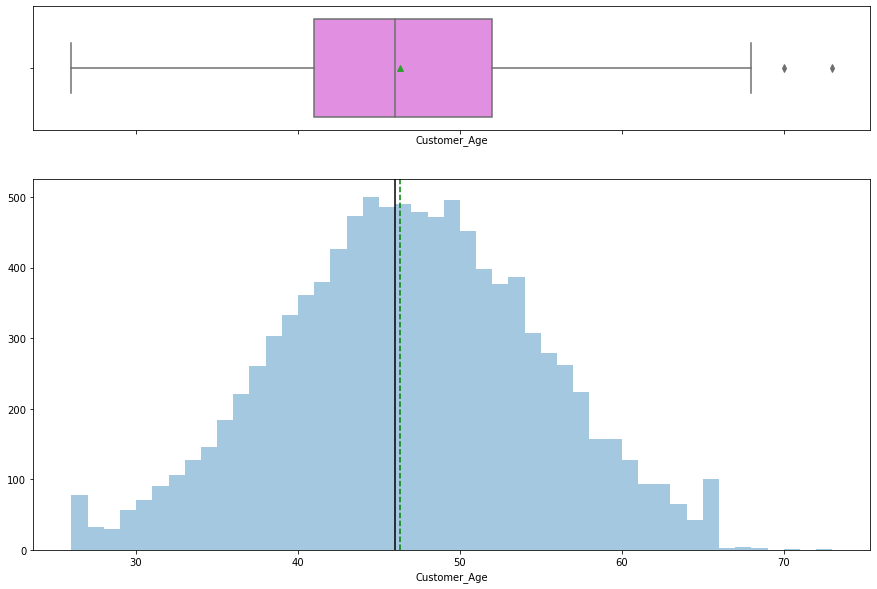

In [11]:
# Observations on Customer_age
histogram_boxplot(data["Customer_Age"])

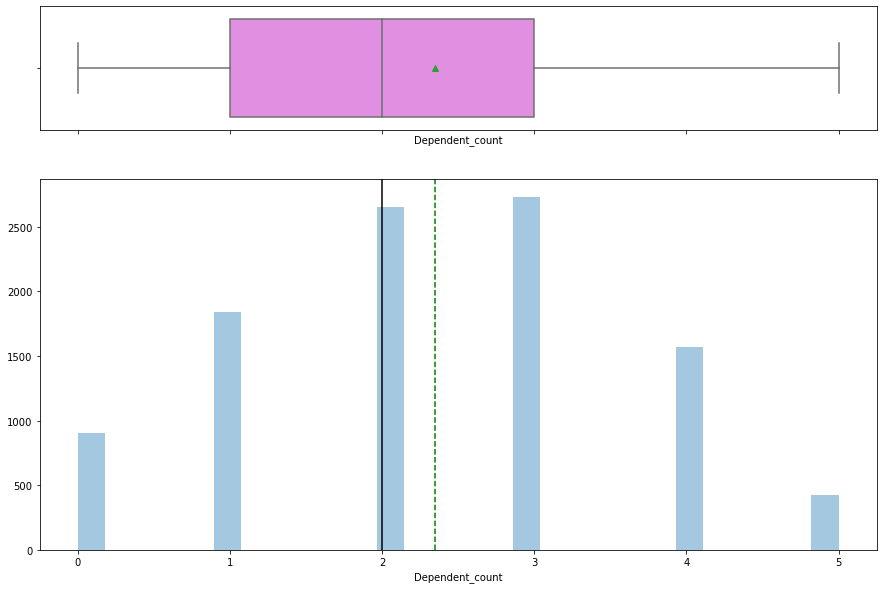

In [12]:
# observations on dependent count 
histogram_boxplot(data["Dependent_count"])

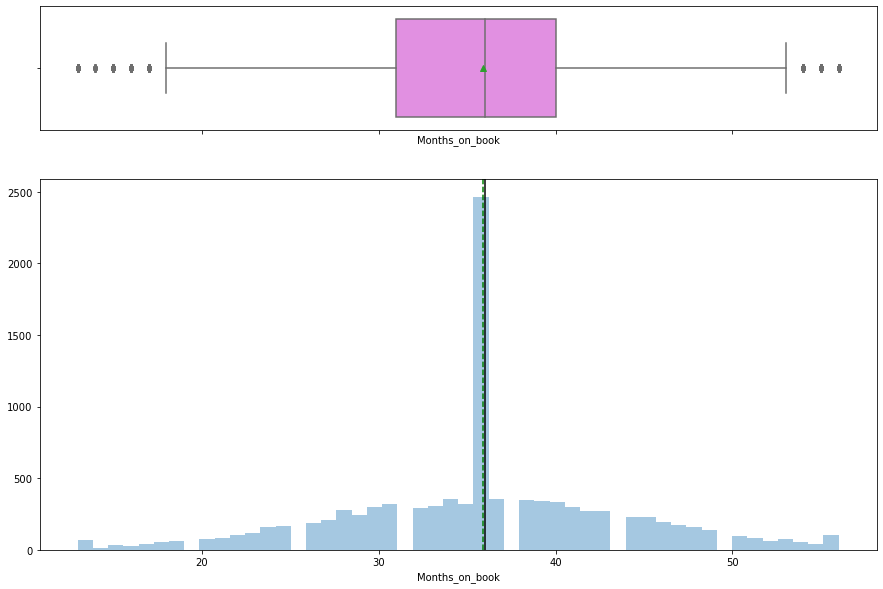

In [14]:
# observations on Period of relationship with the bank
histogram_boxplot(data["Months_on_book"])

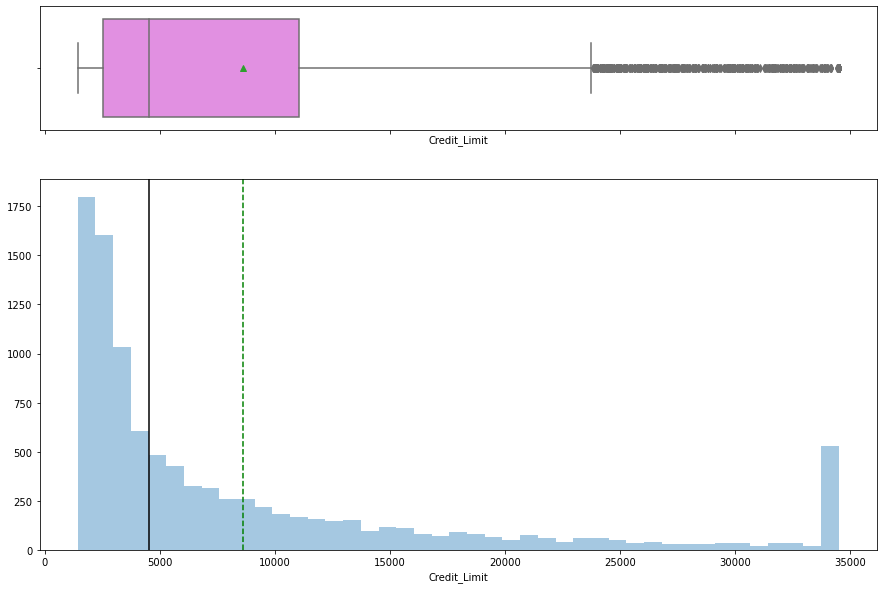

In [15]:
# observations on credit limit 
histogram_boxplot(data["Credit_Limit"])

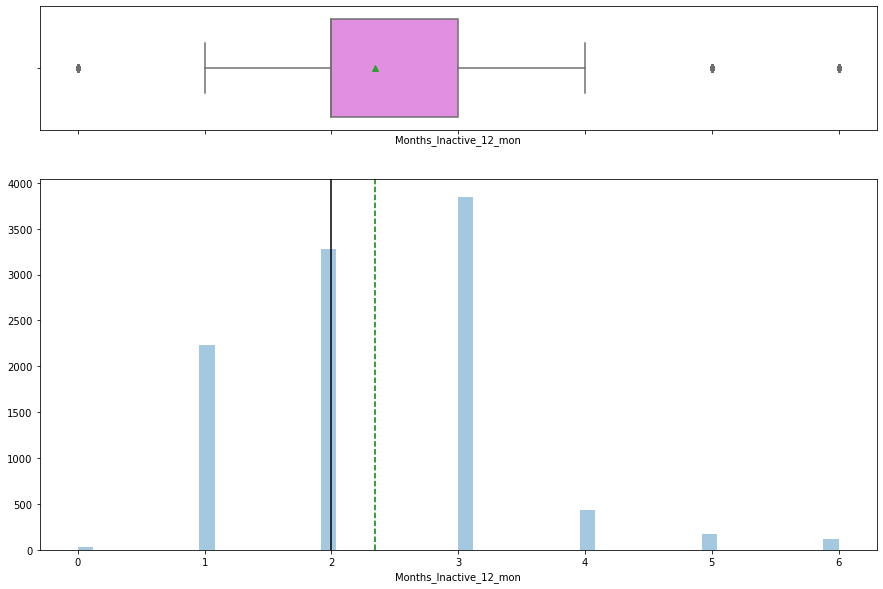

In [16]:
# observations on No. of months inactive in the last 12 months
histogram_boxplot(data["Months_Inactive_12_mon"])

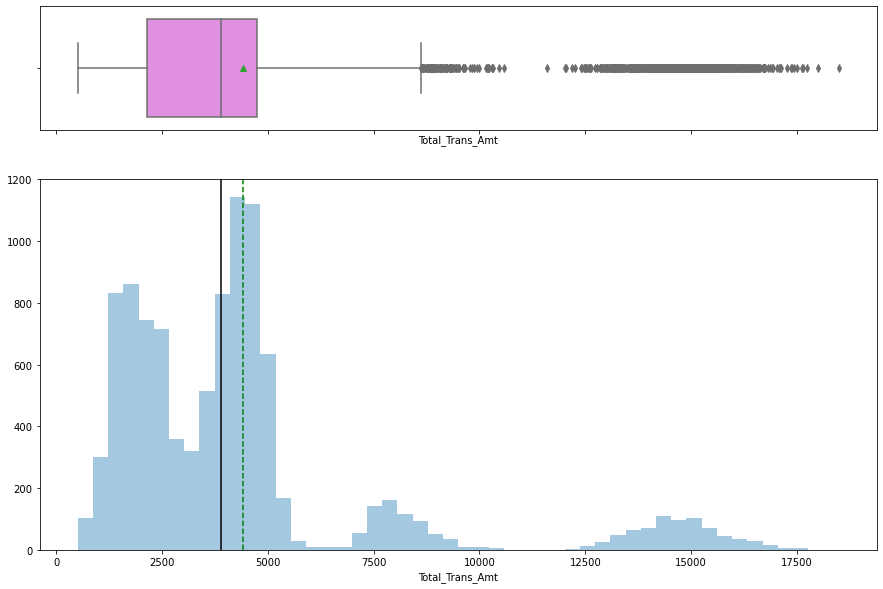

In [17]:
# observations on Total Transaction Amount in Last 12 months
histogram_boxplot(data["Total_Trans_Amt"])


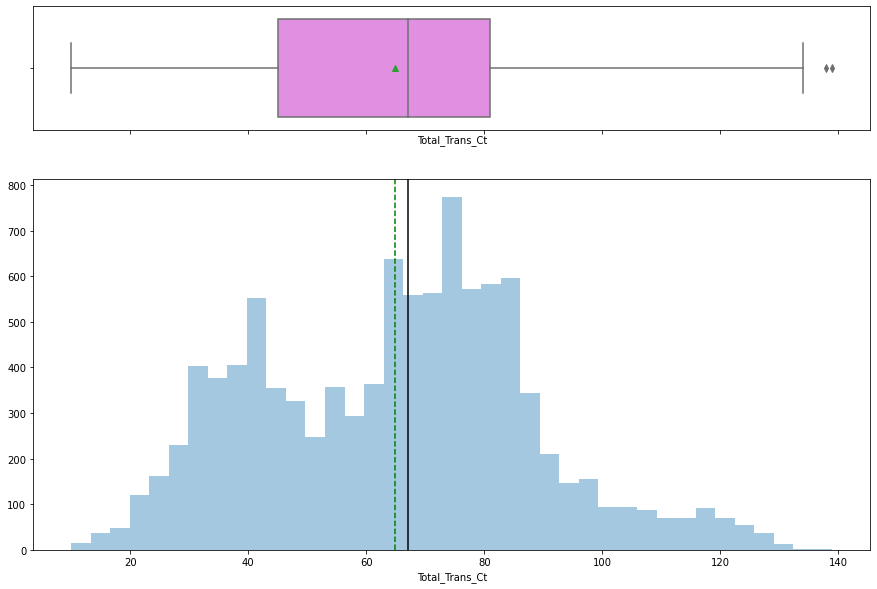

In [18]:
# observations on Total Transaction Count in Last 12 months
histogram_boxplot(data["Total_Trans_Ct"])

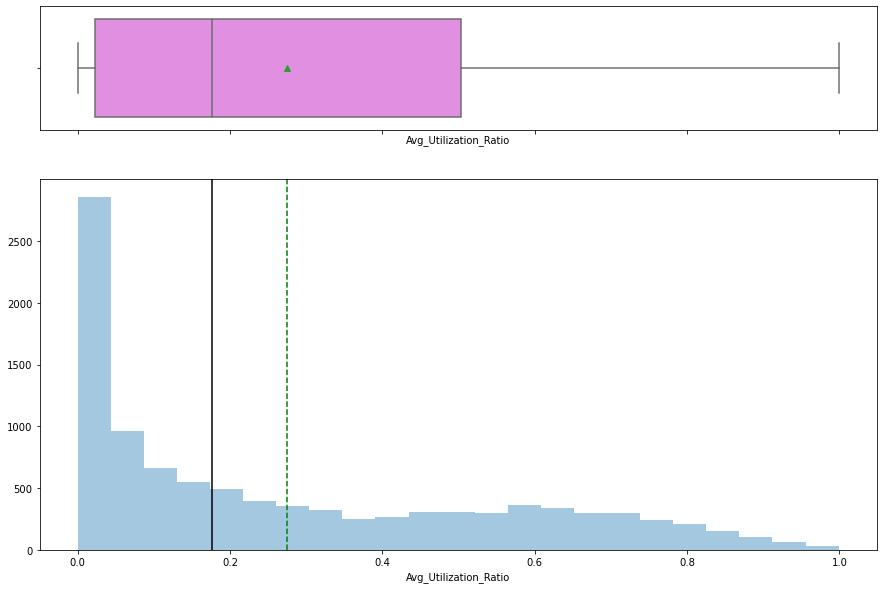

In [19]:
# observations on how much of the available credit the customer spent
histogram_boxplot(data["Avg_Utilization_Ratio"])

## Univariate EDA on categorical variables 

In [20]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

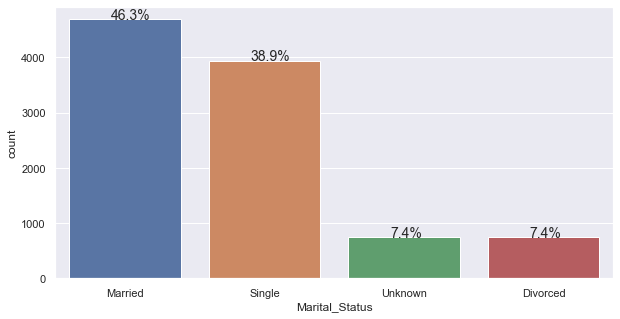

In [21]:
# observations on Marital_Status
perc_on_bar(data["Marital_Status"])

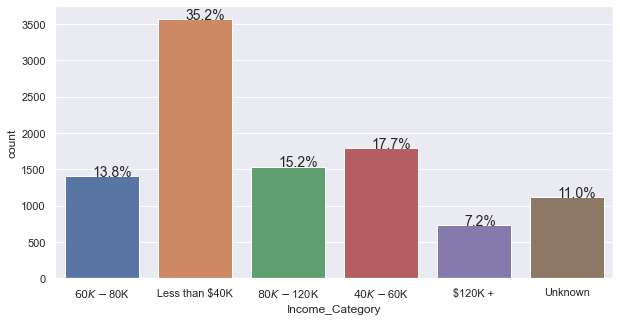

In [25]:
# observations on income
perc_on_bar(data["Income_Category"])

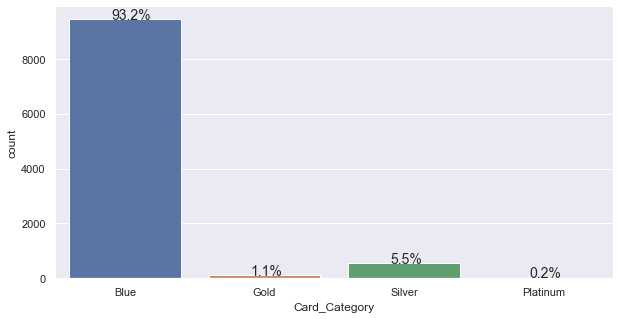

In [26]:
# observations on card type 
perc_on_bar(data["Card_Category"])

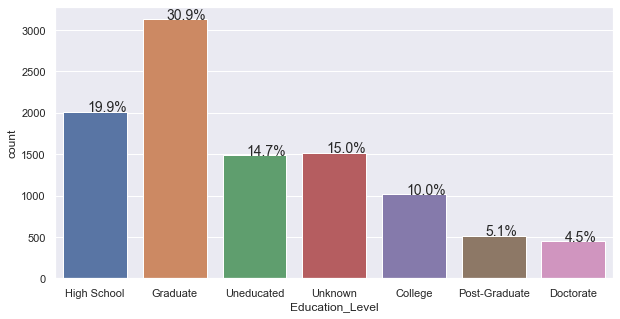

In [22]:
# observations on Education
perc_on_bar(data["Education_Level"])

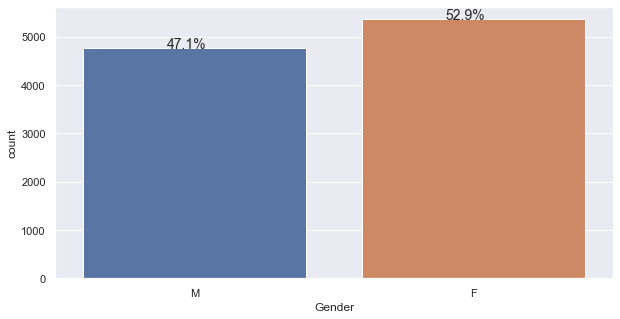

In [23]:
# observations on gender
perc_on_bar(data["Gender"])

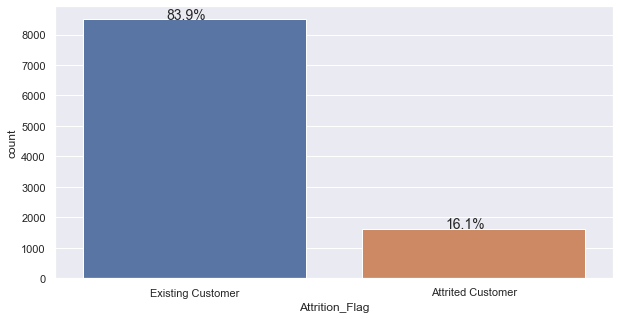

In [24]:
# observations on attrition rate 
perc_on_bar(data["Attrition_Flag"])

## Bivariate EDA

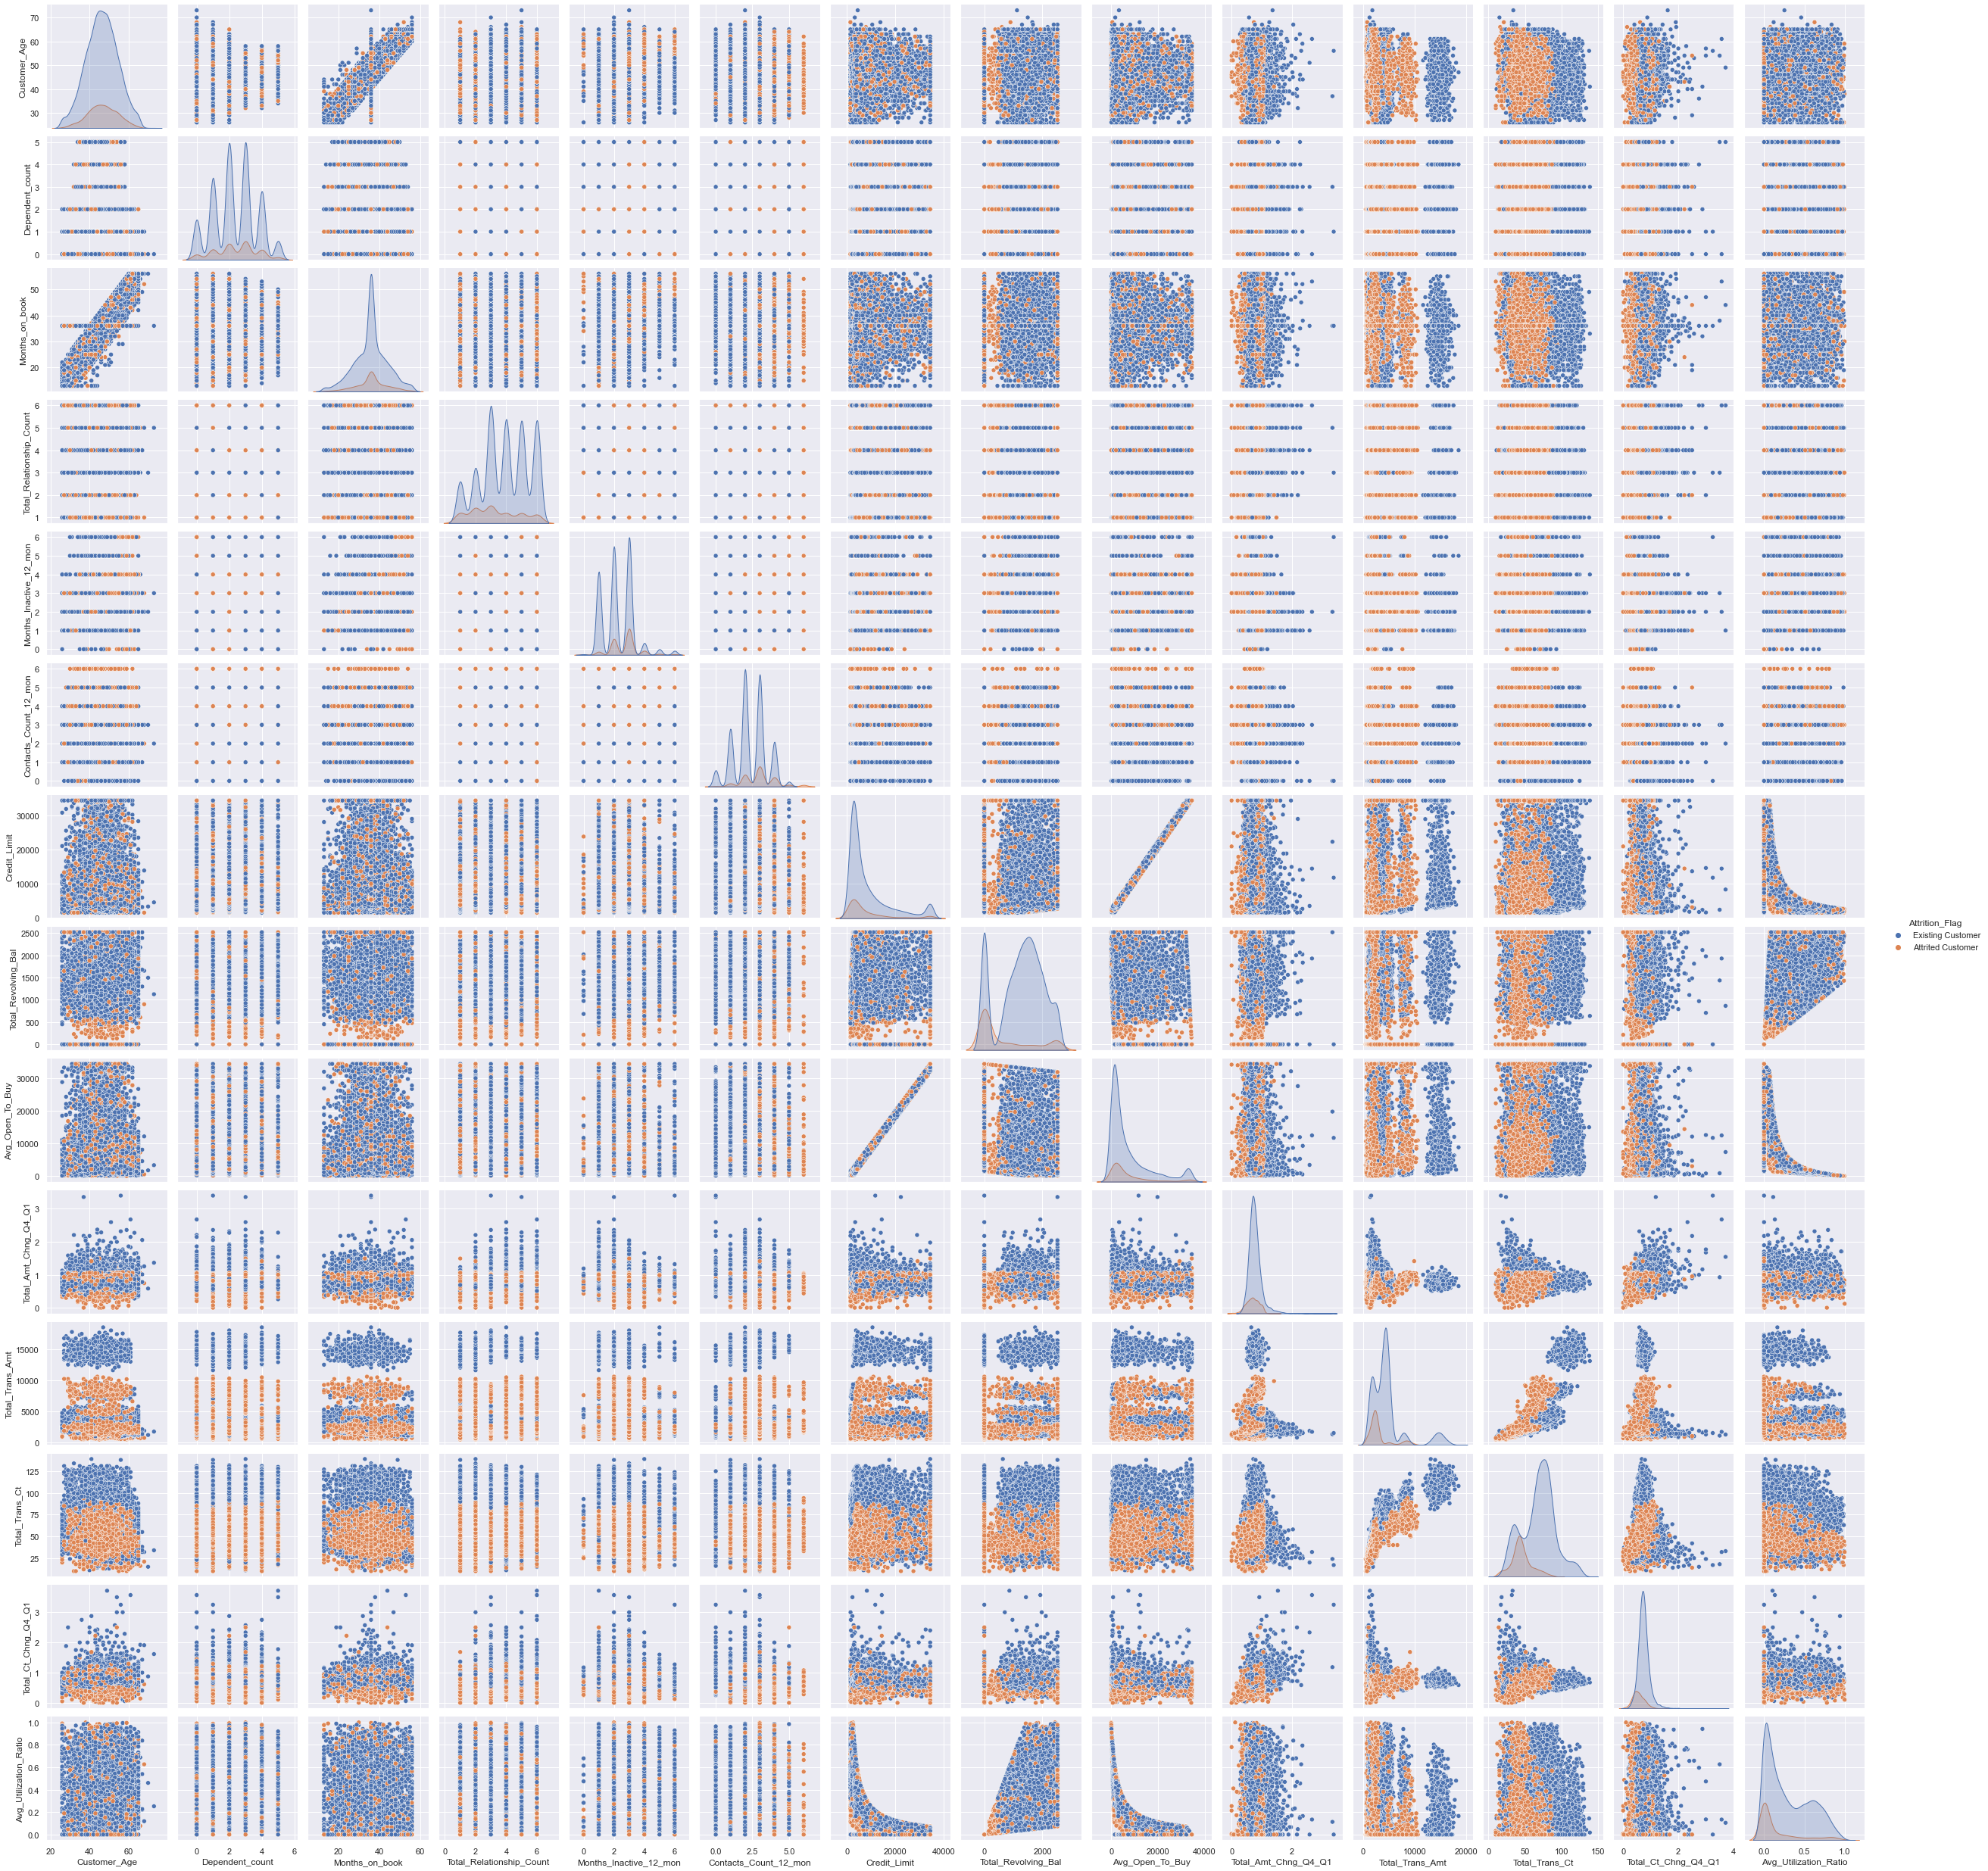

In [27]:
sns.pairplot(data, hue="Attrition_Flag")

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Utilization_Ratio'>

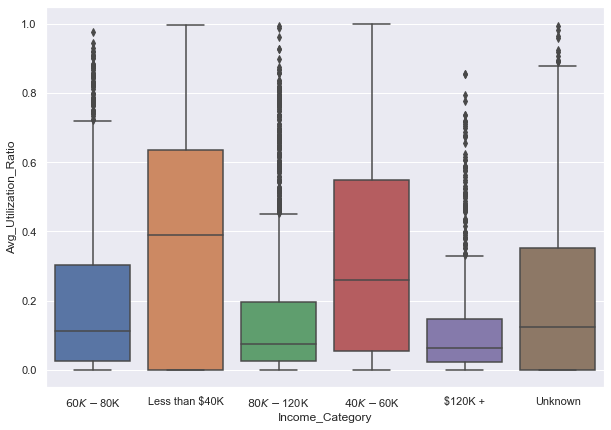

In [35]:
# No. of Contacts between the customer and bank in the last 12 months
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Income_Category", data=data, orient="vertical")

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

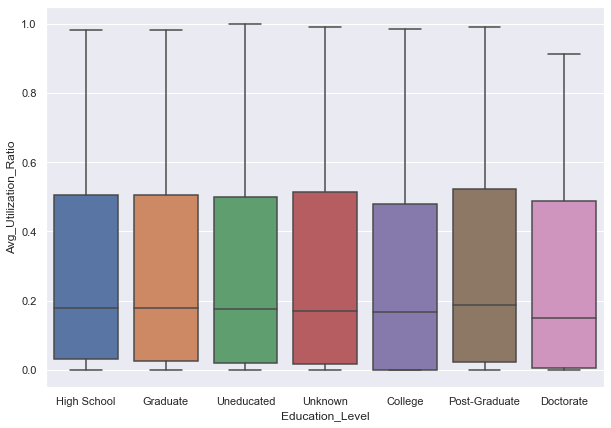

In [36]:
# No. of Contacts between the customer and bank in the last 12 months
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Education_Level", data=data, orient="vertical")

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

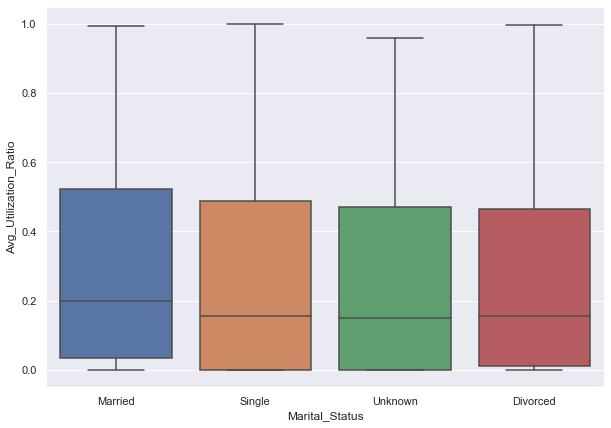

In [37]:
# No. of Contacts between the customer and bank in the last 12 months
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Marital_Status", data=data, orient="vertical")

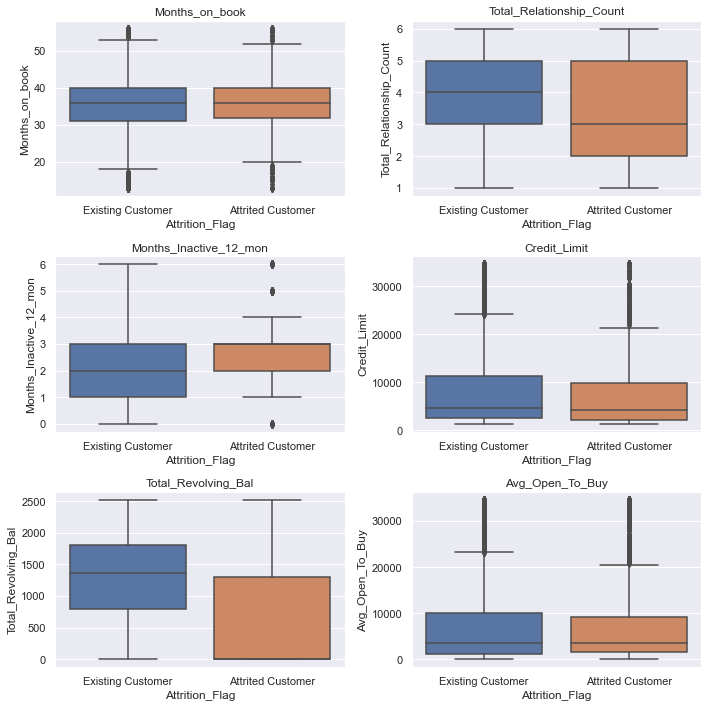

In [43]:
cols = data[
    [
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy"
      
        
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()


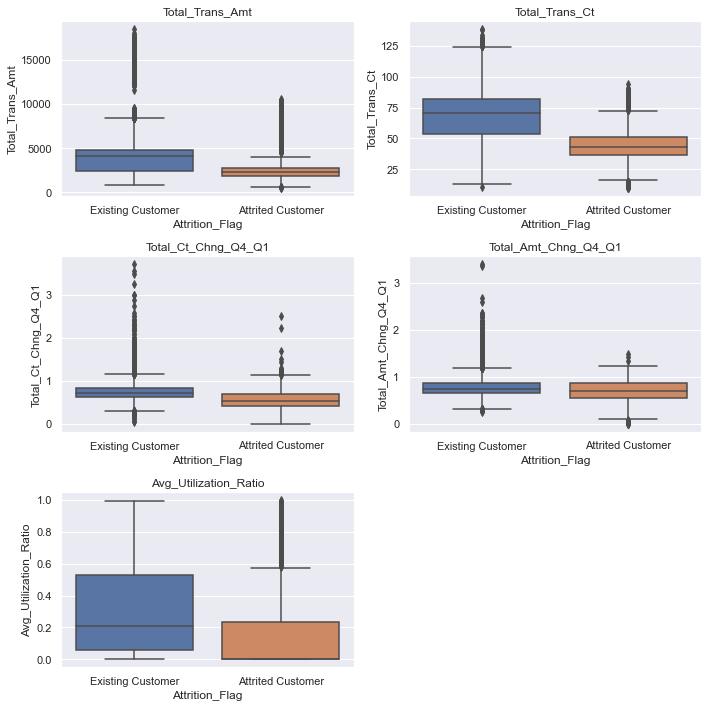

In [44]:
cols = data[
    [
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Total_Amt_Chng_Q4_Q1",
        "Avg_Utilization_Ratio"
      
        
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()
            

In [52]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


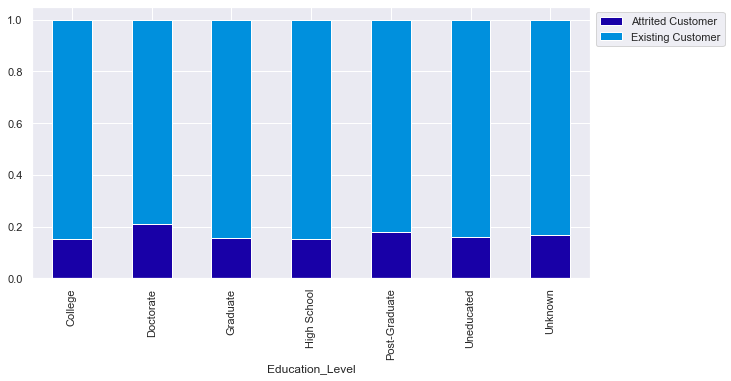

In [53]:
stacked_plot(data["Education_Level"])

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


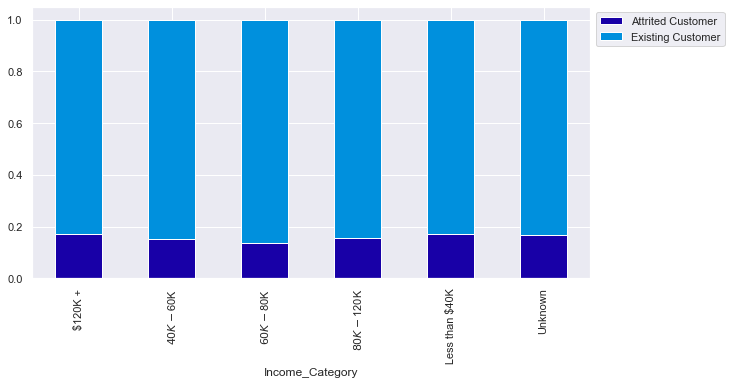

In [54]:
stacked_plot(data["Income_Category"])

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


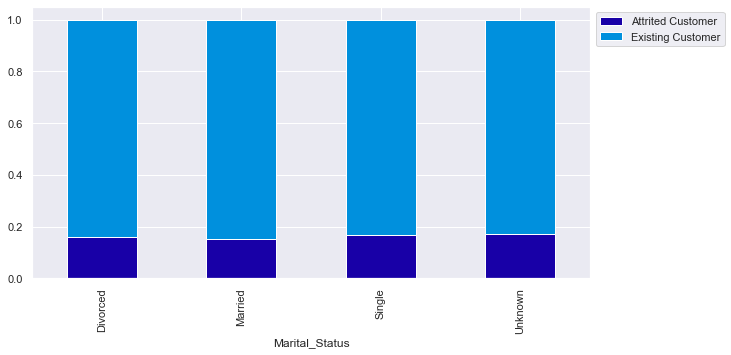

In [55]:
stacked_plot(data["Marital_Status"])

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


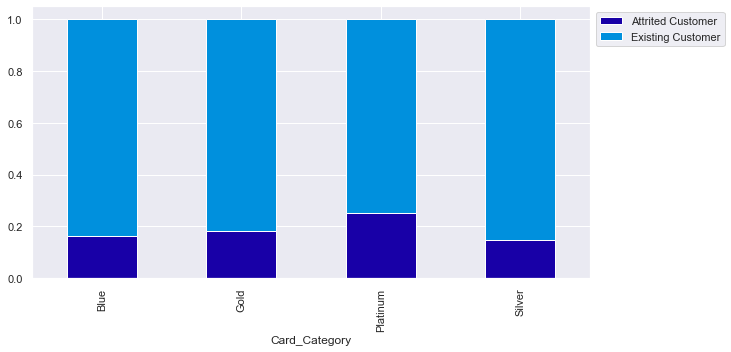

In [57]:
stacked_plot(data["Card_Category"])

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


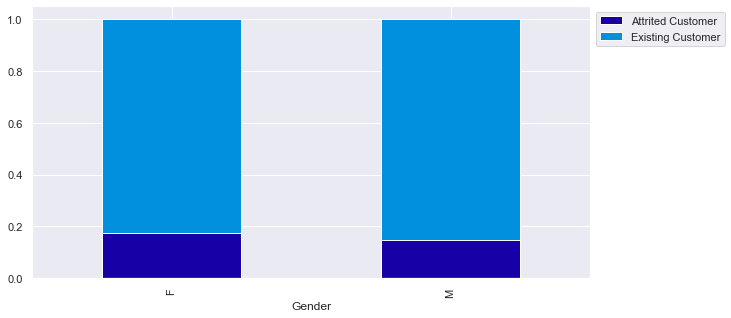

In [58]:
stacked_plot(data["Gender"])

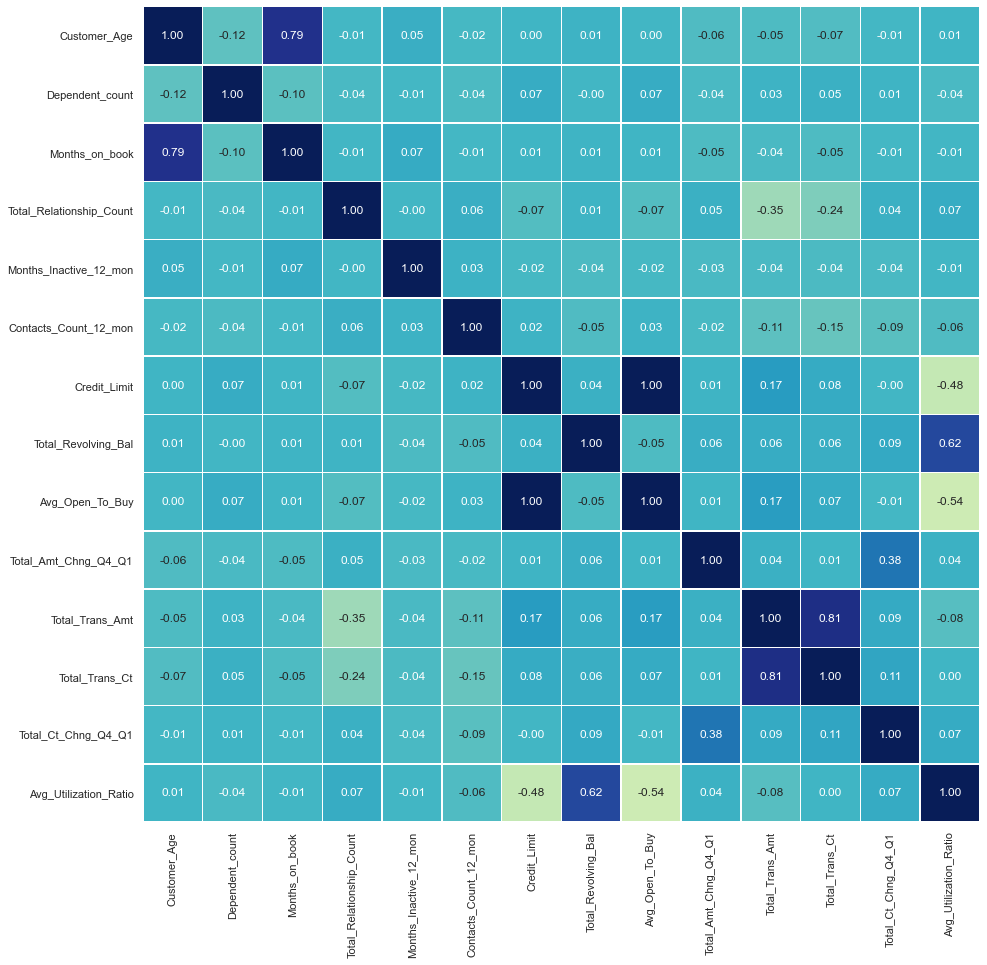

In [59]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

## Data Pre-processing

In [60]:
# Encoding categorical variables 
from sklearn.preprocessing import OneHotEncoder
data["Gender"] = OneHotEncoder(sparse=False).fit_transform(data[['Gender']])
data["Education_Level"] = OneHotEncoder(sparse=False).fit_transform(data[['Education_Level']])
data["Marital_Status"] = OneHotEncoder(sparse=False).fit_transform(data[['Marital_Status']])
data["Income_Category"] = OneHotEncoder(sparse=False).fit_transform(data[['Income_Category']])
data["Card_Category"] = OneHotEncoder(sparse=False).fit_transform(data[['Card_Category']])

In [61]:
data["Attrition_Flag"] = OneHotEncoder(sparse=False).fit_transform(data[['Attrition_Flag']])

## Splitting Dataset 

In [62]:
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

In [63]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [64]:
data

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                 0.0            45     0.0                3              0.0   
1                 0.0            49     1.0                5              0.0   
2                 0.0            51     0.0                3              0.0   
3                 0.0            40     1.0                4              0.0   
4                 0.0            40     0.0                3              0.0   
...               ...           ...     ...              ...              ...   
10122             0.0            50     0.0                2              0.0   
10123             1.0            41     0.0                2              0.0   
10124             1.0            44     1.0                1              0.0   
10125             1.0            30     0.0                2              0.0   
10126             1.0            43     1.0                2              0.0   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                 0.0              0.0            1.0              39   
1                 0.0              0.0            1.0              44   
2                 0.0              0.0            1.0              36   
3                 0.0              0.0            1.0              34   
4                 0.0              0.0            1.0              21   
...               ...              ...            ...             ...   
10122             0.0              0.0            1.0              40   
10123             1.0              0.0            1.0              25   
10124             0.0              0.0            1.0              36   
10125             0.0              0.0            1.0              36   
10126             0.0              0.0            0.0              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             11

# MODEL BUILDING 

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attrite - Loss of resources if he does not 
2. Predicting a customer will not attrite and stay as existing client - Loss of opportunity if he really does 

#### Which case is more important? 
* Predicting that customer will not attrite but he will i.e. losing of a client and thus income for the company because that customer will not be targeted by the marketing team when he should be targeted. Losing a client is more costly than having to search for another client. Predicting that a customer will attrite but he is not is not going to cost as much except for the targeting resources. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall fewer the chances of false negatives.

### Logistic Regression 

In [65]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [66]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

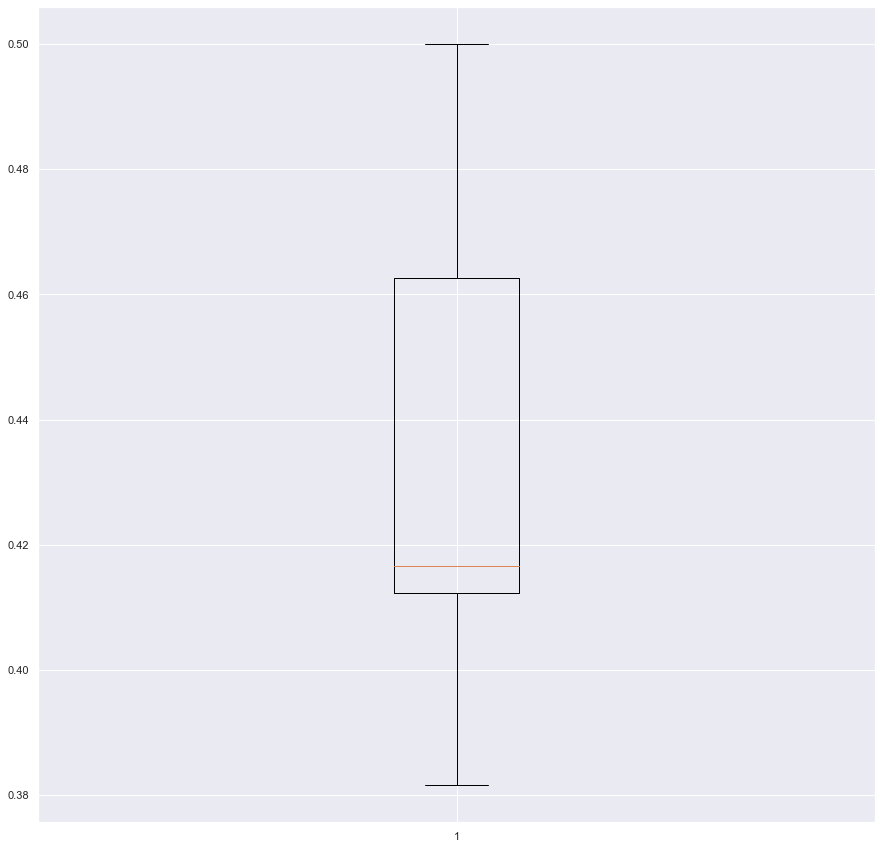

In [68]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.8779627539503386
Accuracy on test set :  0.8792365909838763
Recall on training set :  0.4503950834064969
Recall on test set :  0.4405737704918033
Precision on training set :  0.6821808510638298
Precision on test set :  0.6957928802588996


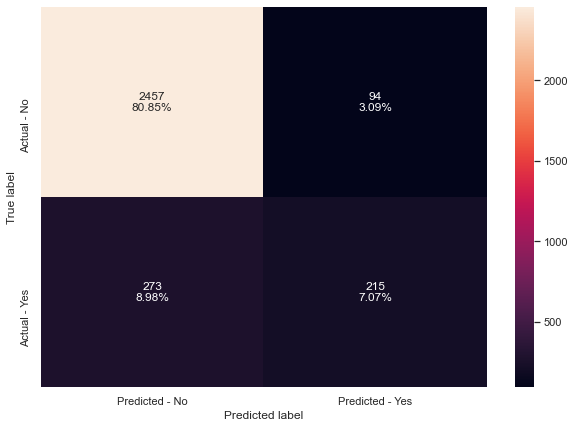

In [69]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

### Oversampling train data using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 19)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [72]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

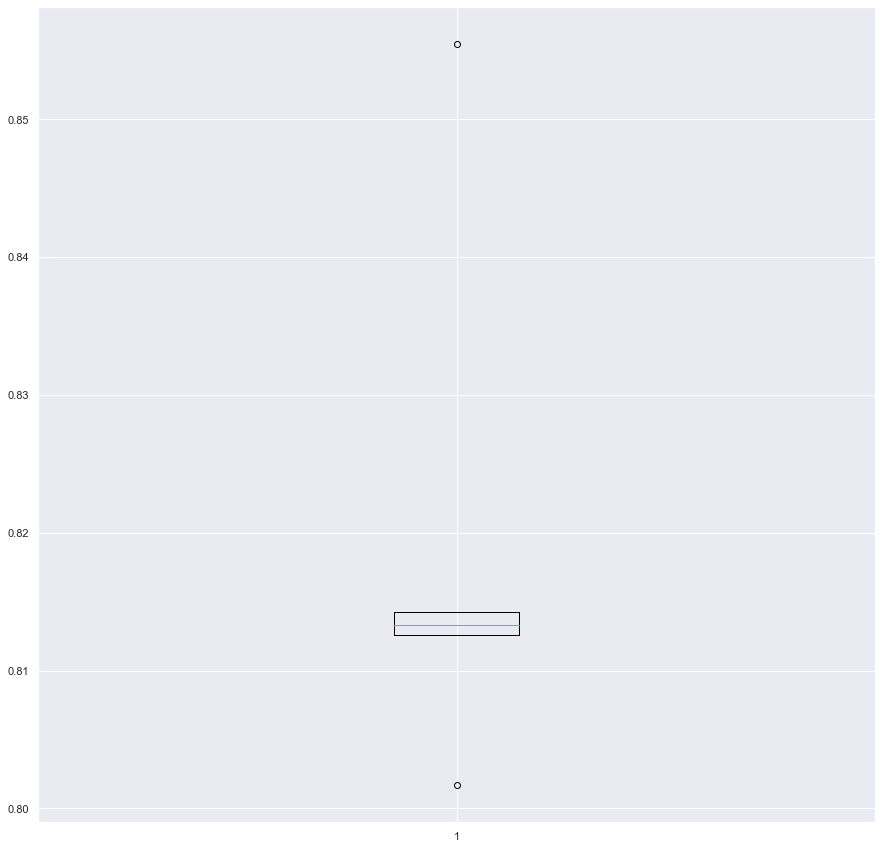

In [73]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.8222390317700454
Accuracy on test set :  0.8042119118130964
Recall on training set :  0.8167759287275173
Recall on test set :  0.7950819672131147
Precision on training set :  0.8257987763426241
Precision on test set :  0.43941109852774635


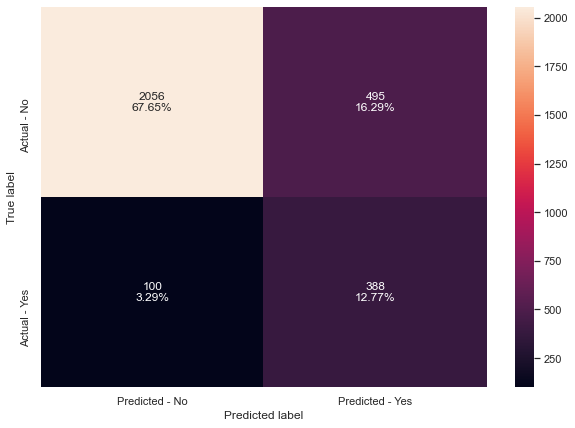

In [74]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

### Regularization

In [75]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7099512523113128
Accuracy on test set :  0.7857847976307996
Recall on training set :  0.578416540595058
Recall on test set :  0.5245901639344263
Precision on training set :  0.7848996350364964
Precision on test set :  0.37925925925925924


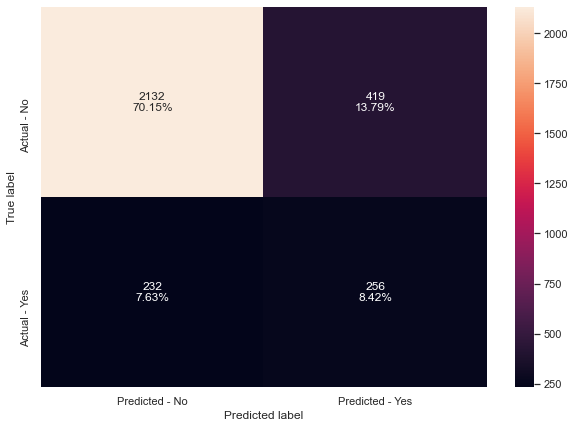

In [76]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

### Undersampling train data using SMOTE

In [77]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [78]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 19)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [79]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

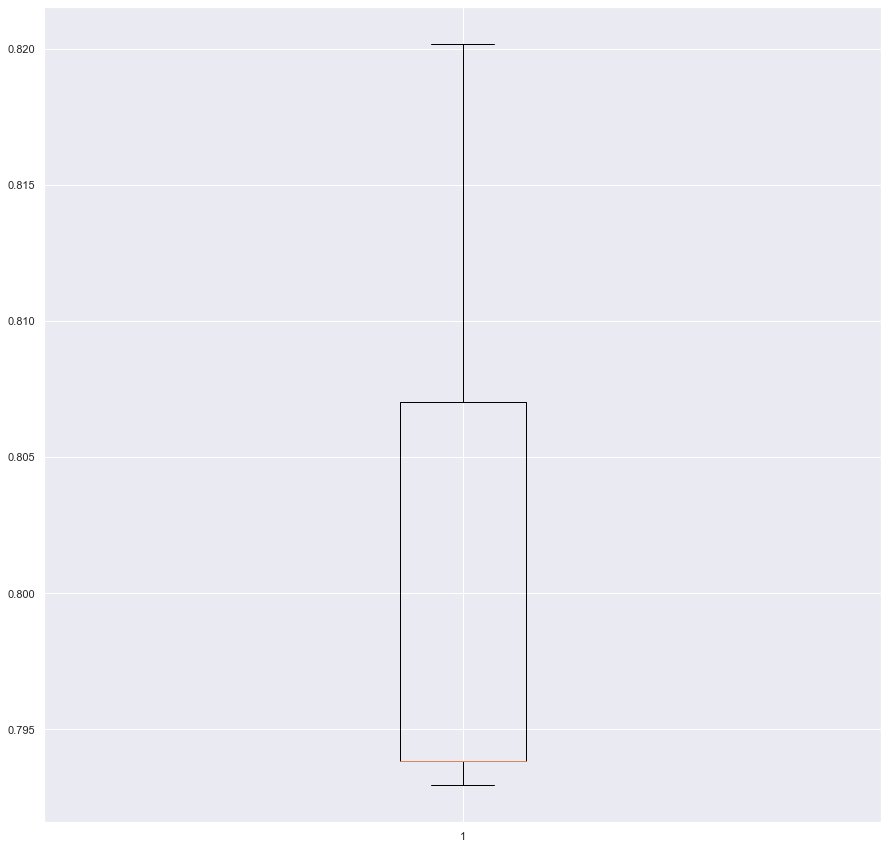

In [80]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.7936786654960492
Accuracy on test set :  0.7765712405396512
Recall on training set :  0.7884108867427568
Recall on test set :  0.7704918032786885
Precision on training set :  0.7968056787932565
Precision on test set :  0.3987274655355249


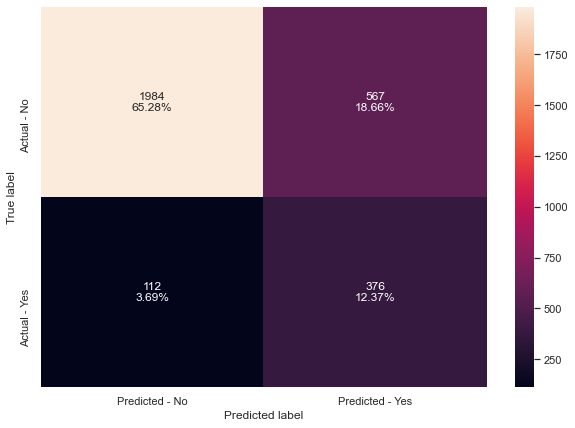

In [81]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

### Comparing Logistic Regression Models 

In [82]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [83]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [84]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [85]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.877963   
1            Logistic Regression on Oversampled data        0.822239   
2  Logistic Regression-Regularized (Oversampled d...        0.709951   
3           Logistic Regression on Undersampled data        0.793679   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.879237      0.450395     0.440574         0.682181        0.695793  
1       0.804212      0.816776     0.795082         0.825799        0.439411  
2       0.785785      0.578417     0.524590         0.784900        0.379259  
3       0.776571      0.788411     0.770492         0.796806        0.398727

In [86]:
# finding coefficients 
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T 

Customer_Age    Gender  Dependent_count  Education_Level  \
coef        0.1423  0.052557         0.165261         0.005964   

      Marital_Status  Income_Category  Card_Category  Months_on_book  \
coef        0.005637        -0.004014        0.02861       -0.088334   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
coef                  -0.08343                0.176649               0.258568   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
coef     -0.000283            -0.000561         0.000278   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
coef              0.003388         0.000467       -0.102058   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
coef            -0.028213               0.002603

In [87]:
# odds from coefficients 
odds = np.exp(log_reg_under.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

Customer_Age    Gender  Dependent_count  Education_Level  \
odds      1.152922  1.053963         1.179701         1.005982   

      Marital_Status  Income_Category  Card_Category  Months_on_book  \
odds        1.005653         0.995994       1.029024        0.915455   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
odds                  0.919955                1.193212               1.295074   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
odds      0.999717              0.99944         1.000278   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
odds              1.003394         1.000467        0.902977   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
odds             0.972181               1.002607

In [88]:
# % change in odds 
perc_change_odds = (np.exp(log_reg_under.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Customer_Age    Gender  Dependent_count  Education_Level  \
change_odds%      15.29222  5.396314        17.970108          0.59821   

              Marital_Status  Income_Category  Card_Category  Months_on_book  \
change_odds%        0.565267        -0.400579       2.902352       -8.454464   

              Total_Relationship_Count  Months_Inactive_12_mon  \
change_odds%                 -8.004455               19.321209   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
change_odds%              29.507441     -0.028287            -0.056047   

              Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
change_odds%         0.027775              0.339405         0.046662   

              Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
change_odds%       -9.702273            -2.781903               0.260671

## Bagging and Boosting Models 

In [89]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 58.2985547569364
RF: 81.12180230311463
GBM: 83.9315248473607
ADB: 84.02117628873947
[13:36:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.c

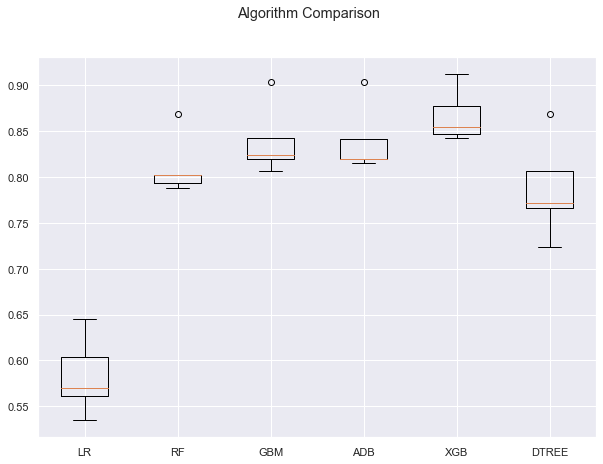

In [91]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [92]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [93]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Ada Boost GridSearchCV 

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} 
Score: 0.8701058814436975
CPU times: user 4.36 s, sys: 1.19 s, total: 5.55 s
Wall time: 6min 47s


In [95]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9954853273137697
Accuracy on test set :  0.9723593287265548
Recall on training set :  0.9833187006145742
Recall on test set :  0.9118852459016393
Precision on training set :  0.9885260370697264
Precision on test set :  0.9156378600823045


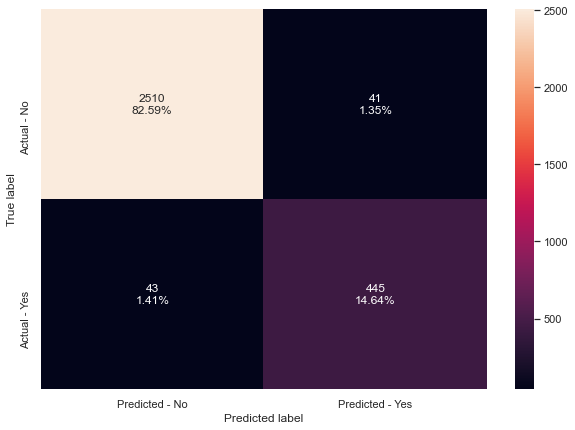

In [96]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### Ada Boost RandomizedSearchCV 

In [97]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8674588453512635:
CPU times: user 3min 11s, sys: 2.35 s, total: 3min 13s
Wall time: 3min 32s


In [98]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9954853273137697
Accuracy on test set :  0.9723593287265548
Recall on training set :  0.9833187006145742
Recall on test set :  0.9118852459016393
Precision on training set :  0.9885260370697264
Precision on test set :  0.9156378600823045


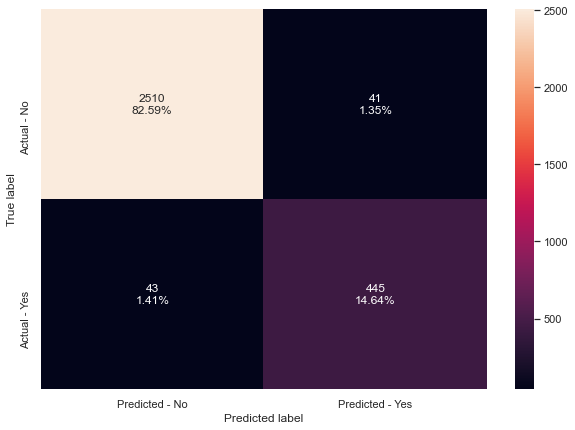

In [99]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

### XGBoost GridSearchCV 

In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### XGBoost RandomizedSearchCV 

In [100]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9613841873405983:
CPU times: user 15min 29s, sys: 17.1 s, total: 15min 47s
Wall time: 7min 11s


In [101]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7602990970654627
Accuracy on test set :  0.7512339585389931
Recall on training set :  0.9675153643546971
Recall on test set :  0.9610655737704918
Precision on training set :  0.3986975397973951
Precision on test set :  0.3888888888888889


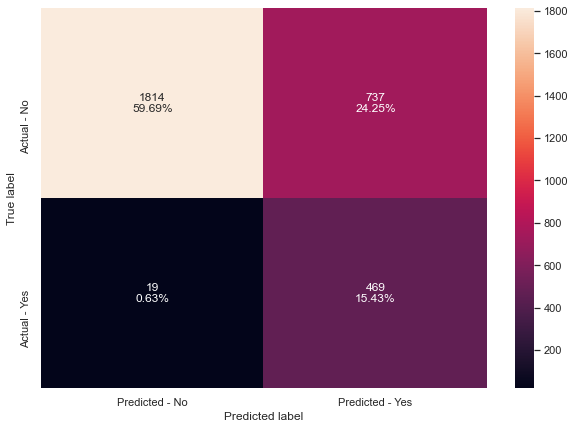

In [102]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### Decision Tree GridSearchCV 

In [103]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2} 
Score: 0.8095100085014298


In [104]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=4),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=4, random_state=1))])

Accuracy on training set :  0.9961907449209932
Accuracy on test set :  0.9410990457387298
Recall on training set :  0.9850746268656716
Recall on test set :  0.8278688524590164
Precision on training set :  0.991166077738516
Precision on test set :  0.8096192384769539


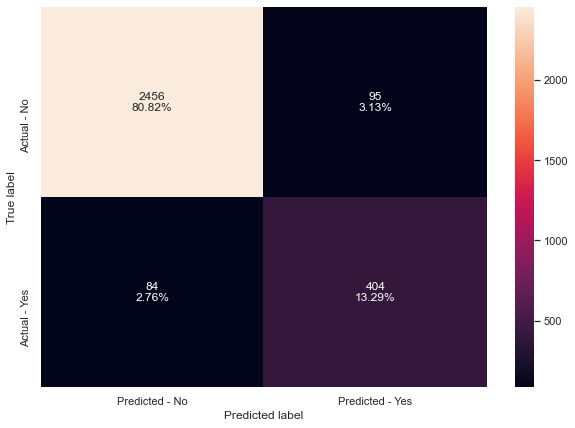

In [105]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

### Decision Tree RandomizedSearchCV 

In [106]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.8095100085014298:


In [107]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=7),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=7, random_state=1))])

Accuracy on training set :  0.990265237020316
Accuracy on test set :  0.9440605462323133
Recall on training set :  0.9640035118525022
Recall on test set :  0.8340163934426229
Precision on training set :  0.9751332149200711
Precision on test set :  0.8205645161290323


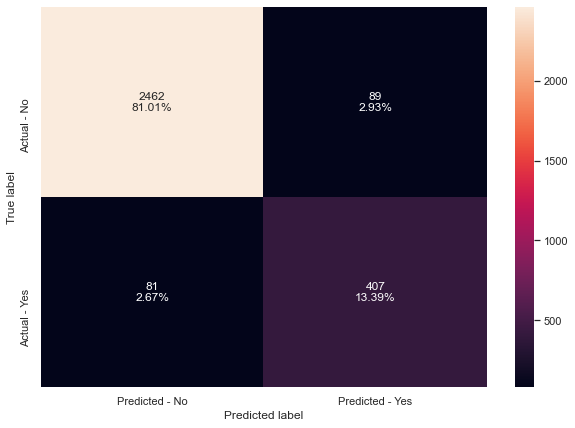

In [108]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

## Comparing All Models 

In [ ]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2,dtree_tuned1, dtree_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV"
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)   

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()